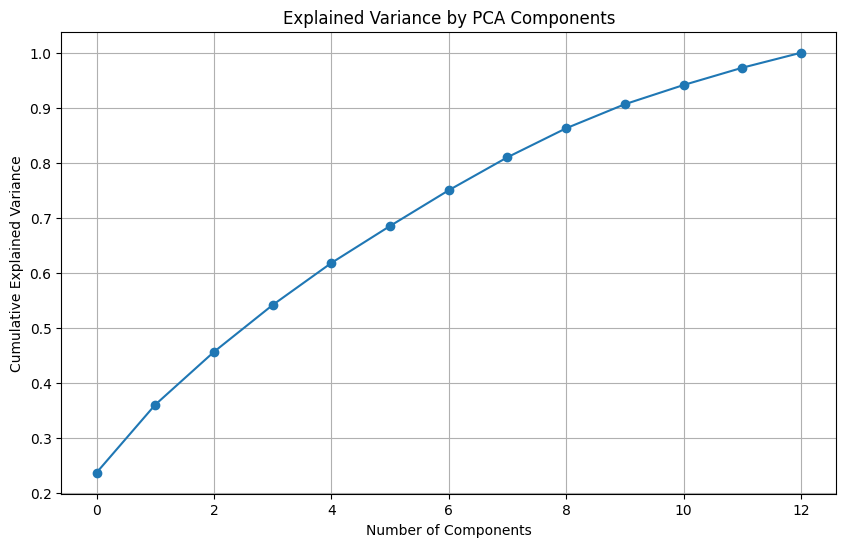

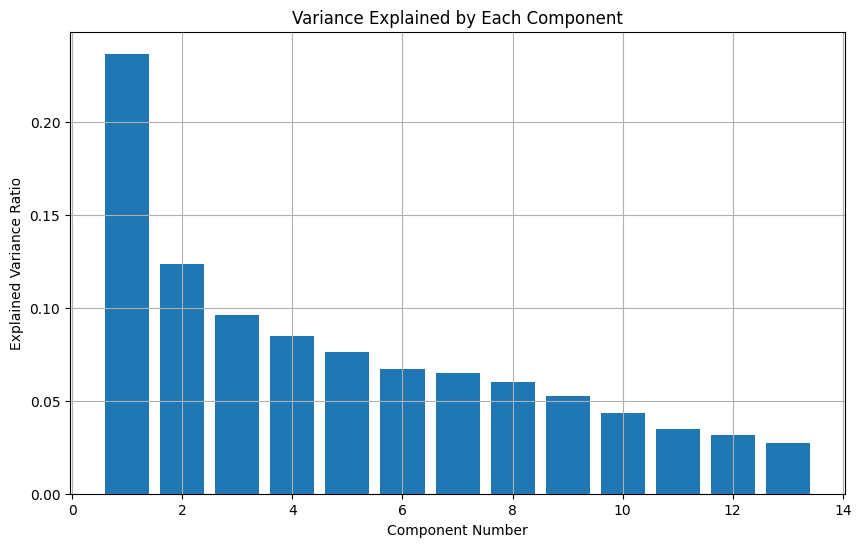

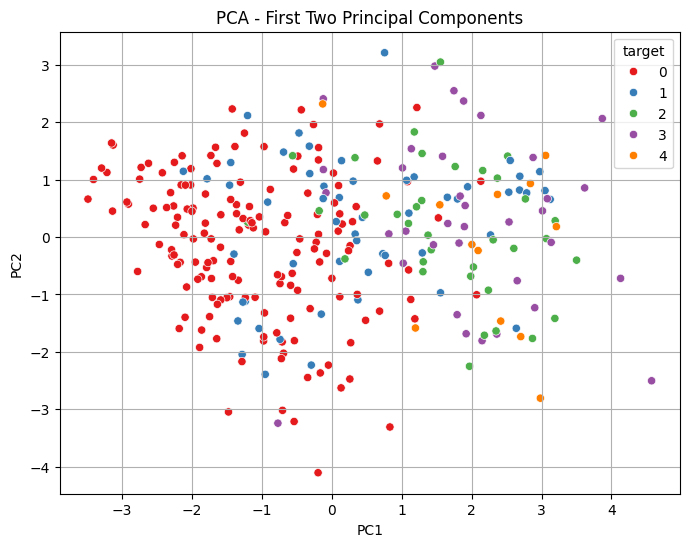

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

columns = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]

df = pd.read_csv("../data/heart_disease.csv", header=None)
df.columns = columns
df = df.replace('?', np.nan)
df = df.dropna()
df[['ca', 'thal']] = df[['ca', 'thal']].astype(float)

X = df.drop("target", axis=1)
y = df["target"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(10,6))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()

plt.figure(figsize=(10,6))
plt.bar(range(1, len(explained_variance)+1), explained_variance)
plt.xlabel('Component Number')
plt.ylabel('Explained Variance Ratio')
plt.title('Variance Explained by Each Component')
plt.grid(True)
plt.show()

pca_2 = PCA(n_components=2)
X_pca_2d = pca_2.fit_transform(X_scaled)
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca_2d[:,0], y=X_pca_2d[:,1], hue=y, palette='Set1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA - First Two Principal Components')
plt.grid(True)
plt.show()
